In [1]:
import numpy as np
from scipy.signal import hilbert, butter, filtfilt, lfilter

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

import matplotlib.pyplot as plt

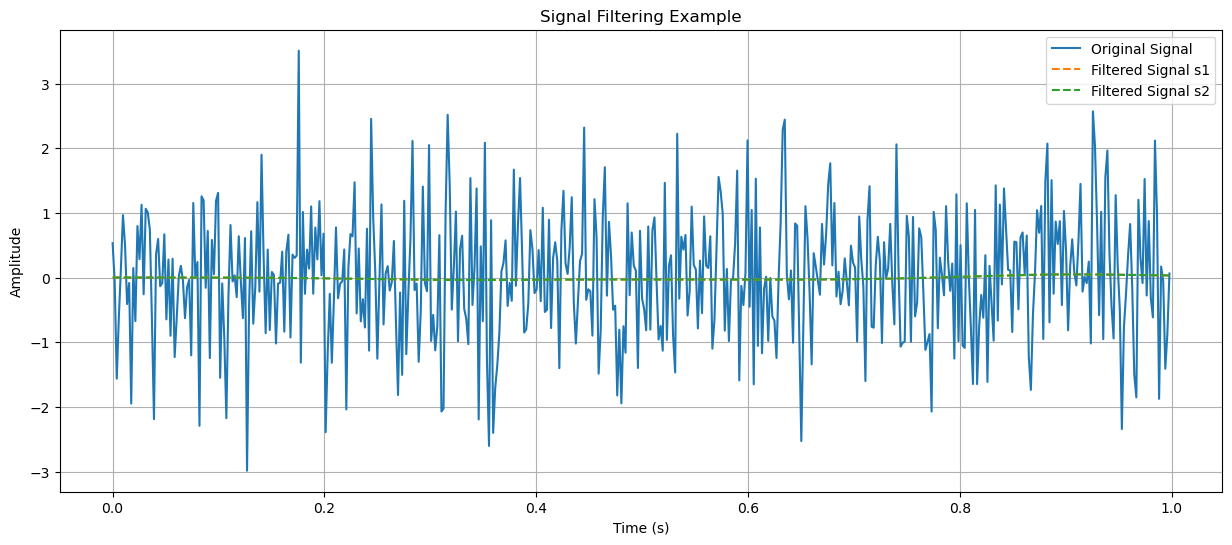

In [28]:
# Параметры
Fs = 512  
T = 1000 

t = np.linspace(0, T, int(Fs * T))
s = np.random.randn(1, len(t))

def butter_filter(order, cutoff, btype, fs):
    nyquist = fs / 2
    normalized_cutoff = np.array(cutoff) / nyquist
    b, a = butter(order, normalized_cutoff, btype=btype)
    return b, a

b_vel, a_vel = butter_filter(order=5, cutoff=2, btype='low', fs=Fs)
s1 = lfilter(b_vel, a_vel, s)
s2 = lfilter(b_vel, a_vel, s, axis=1)

# Построение графиков
plt.figure(figsize=(15, 6))

interval = 512
plt.plot(t[:interval], s.squeeze()[:interval], label='Original Signal')
plt.plot(t[:interval], s1.squeeze()[:interval], label='Filtered Signal s1', linestyle='--')
plt.plot(t[:interval], s2.squeeze()[:interval], label='Filtered Signal s2', linestyle='--')

plt.title('Signal Filtering Example')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

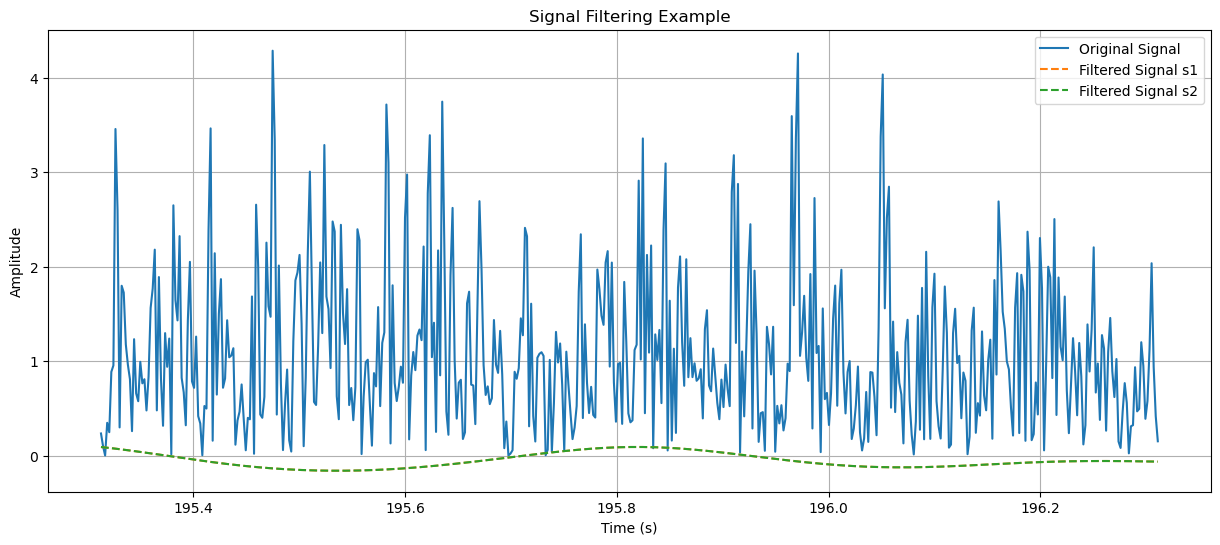

In [65]:
torch.manual_seed(42)
# np.random.seed(42)

# Параметры
Fs = 512
T = 1000 
N_EMG = 8
N_joints = 1

# Временной вектор
t = np.linspace(0, T, int(Fs * T))

# Функция для создания фильтра
def butter_filter(order, cutoff, btype, fs):
    nyquist = fs / 2
    normalized_cutoff = np.array(cutoff) / nyquist
    b, a = butter(order, normalized_cutoff, btype=btype)
    return b, a

# Генерация сырых данных ЭМГ
b_myo, a_myo = butter_filter(order=5, cutoff=[15, 150], btype='band', fs=Fs)
b_vel, a_vel = butter_filter(order=5, cutoff=2, btype='low', fs=Fs)
b_hp, a_hp = butter_filter(order=3, cutoff=0.1, btype='high', fs=Fs)

s = lfilter(b_myo, a_myo, np.random.randn(N_EMG, len(t)))

input_signal = torch.tensor(s.copy())
# Создание пространственной матрицы смешивания
A = np.random.randn(N_joints, N_EMG)
input_signal = torch.abs(torch.matmul(torch.tensor(A.copy()), input_signal))
target_signal = torch.tensor(lfilter(b_vel, a_vel, input_signal))
target_signal = torch.tensor(lfilter(b_hp, a_hp, target_signal, axis=1))

# Построение графиков
plt.figure(figsize=(15, 6))

interval = 100512
plt.plot(t[100000:interval], input_signal.squeeze()[100000:interval], label='Original Signal')
plt.plot(t[100000:interval], target_signal.squeeze()[100000:interval], label='Filtered Signal s1', linestyle='--')
plt.plot(t[100000:interval], target_signal.squeeze()[100000:interval], label='Filtered Signal s2', linestyle='--')

plt.title('Signal Filtering Example')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()